### Familiarízate con las técnicas de exploración de los datos mediante la estructura de datos, Dataframe con la librería Pandas.
___
# Nivel 1
## Ejercicio 1
Descarga el dataset Airlines Delay: Airline on-time statistics and delay causas y cárgalo a un pandas Dataframe. Explora los datos que contiene, y quedate únicamente con las columnas que consideres relevantes.



In [1]:
#primero importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
#ahora subimos el dataset a un panda dataframe
airlines_delay = pd.read_csv('DelayedFlights.csv')

obtenemos informacion basica del tipo de datos que contiene el dataset con la funcion *'info()'*, con la que se obtienen los detalles sobre el conjunto de datos, como el número de filas y columnas, los nombres de las columnas, qué tipo de datos hay en cada columna y cuánta memoria se está usando.

In [4]:
airlines_delay.info() #proporciona informacion basica del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
airlines_delay.head() #muestra las primeras filas de datos para visuzalizar la estructura del dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## Ejercicio 2
Realiza un informe completo del dataset:.

- Resume estadísticamente las columnas de interés



Para seleccionaar las columnas, se pueden seleccionar por el nombre de la columna (*'serie'*) o por el index de la columna. En este caso se seleccionaron en base al titulo de la columna:

In [52]:
int_airlines_delay = airlines_delay[['UniqueCarrier','Year','DepDelay','ArrDelay','FlightNum','AirTime', 'Distance']] #seleccion de columnas de interes
extract_delay =int_airlines_delay.copy() #crea una copia del dataframe con las columnas seleccionadas
extract_delay.head()

,UniqueCarrier,Year,DepDelay,ArrDelay,FlightNum,AirTime,Distance
0,WN,2008,8.0,-14.0,335,116.0,810
1,WN,2008,19.0,2.0,3231,113.0,810
2,WN,2008,8.0,14.0,448,76.0,515
3,WN,2008,34.0,34.0,3920,77.0,515
4,WN,2008,25.0,11.0,378,87.0,688


In [7]:
# llamada al metodo que proporciona una descripcion estadistica de las columnas seleccionadas
extract_delay.describe()

,Year,DepDelay,ArrDelay,FlightNum,AirTime,Distance
count,1936758.0,1.936758e+06,1.928371e+06,1.936758e+06,1.928371e+06,1.936758e+06
mean,2008.0,4.318518e+01,4.219988e+01,2.184263e+03,1.082771e+02,7.656862e+02
std,0.0,5.340250e+01,5.678472e+01,1.944702e+03,6.864261e+01,5.744797e+02
min,2008.0,6.000000e+00,-1.090000e+02,1.000000e+00,0.000000e+00,1.100000e+01
25%,2008.0,1.200000e+01,9.000000e+00,6.100000e+02,5.800000e+01,3.380000e+02
50%,2008.0,2.400000e+01,2.400000e+01,1.543000e+03,9.000000e+01,6.060000e+02
75%,2008.0,5.300000e+01,5.600000e+01,3.422000e+03,1.370000e+02,9.980000e+02
max,2008.0,2.467000e+03,2.461000e+03,9.742000e+03,1.091000e+03,4.962000e+03


- Encuentra cuántos datos faltantes hay por columna


In [51]:
airlines_delay.isnull().sum() #busca los datos faltantes y sumariza el resultado

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Late arrival              0
total_delay            8387
dtype: int64

In [9]:
extract_delay.isnull().sum()

UniqueCarrier       0
Year                0
DepDelay            0
ArrDelay         8387
FlightNum           0
AirTime          8387
Distance            0
dtype: int64

Se puede observar que 12 columnas tienen datos faltantes en el dataset original y que el dataset de columnas de interes solo 2 columnas tienen datos faltantes.

## - Crea nuevas columnas (velocidad media del vuelo, si ha llegado tarde o no...)


In [59]:
#Se crea una nueva columna especificando el titulo y se genera el calculo de la
#velocidad media de vuelo = (distancia / tiempo de vuelo) llamando a la columna la informacion necesaria
airlines_delay['Meanspeed'] = airlines_delay['Distance'] / (airlines_delay['AirTime']/60)
airlines_delay[['FlightNum','Meanspeed']].head() #se muestra la meanspeed de cada vuelo

,FlightNum,Meanspeed
0,335,418.965517
1,3231,430.088496
2,448,406.578947
3,3920,401.298701
4,378,474.482759


In [60]:
#de igual manera se crea un condicional para determinar si un vuelo sufrio retraso o no
airlines_delay['Late arrival'] = np.where(airlines_delay['ArrDelay'] >0, True, False)
airlines_delay[['FlightNum','Late arrival']].head() #se muestra el numero de vuelo y el resultado de la nueva columna

,FlightNum,Late arrival
0,335,False
1,3231,True
2,448,True
3,3920,True
4,378,True


## - Tabla de las aerolíneas con mayores retrasos acumulados

Para crear la tabla de aerolineas con mayores retrasos se hicieron los siguientes pasos:

1. Se filtro una nueva lista que solo incluye los vuelos que han tenido retraso con un condicional 
2. Se ordenaron los valores *'sort_values'* y se tomaron solo los primeros 5 valores
3. Se imprime la tabla con los valores 
 

Dicho proceso se siguio tanto para Departure y Arrival delay.

In [76]:
#se crea una nueva lista agrupando los vuelos con retraso por compañia aerea 'groupby'
most_delayedDep = airlines_delay.loc[airlines_delay['DepDelay']>0].groupby(['UniqueCarrier']).size().sort_values(ascending=False).head(5)
print("El top 5 de Aerolineas con mayor retraso en departure es:\n") 
most_delayedDep

El top 5 de Aerolineas con mayor retraso en departure es:



UniqueCarrier
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
dtype: int64

In [79]:
most_delayedArr = airlines_delay.loc[airlines_delay['ArrDelay']>0].groupby(['UniqueCarrier']).size().sort_values(ascending=False).head(5)
print("El top 5 de Aerolineas con mayor retraso en la llegada es:\n") 
most_delayedArr

El top 5 de Aerolineas con mayor retraso en la llegada es:



UniqueCarrier
WN    324717
AA    172197
MQ    130647
UA    123989
OO    121942
dtype: int64

In [77]:
print('Los vuelos con mayor retraso en la salida son:')
airlines_delay.sort_values(by='DepDelay',ascending=False).head(5)[['UniqueCarrier','Origin','Dest','DepDelay']]

Los vuelos con mayor retraso en la salida son:


,UniqueCarrier,Origin,Dest,DepDelay
686014,NW,CLT,MSP,2467.0
322516,NW,HNL,MSP,2457.0
839306,NW,RSW,DTW,1952.0
1009553,MQ,LIT,DFW,1710.0
1881639,NW,BOS,MSP,1597.0


In [78]:
print('Los vuelos con mayor retraso en la llegada son:')
airlines_delay.sort_values(by='ArrDelay',ascending=False).head(5)[['UniqueCarrier','Origin','Dest','ArrDelay']]

Los vuelos con mayor retraso en la llegada son:


,UniqueCarrier,Origin,Dest,ArrDelay
322516,NW,HNL,MSP,2461.0
686014,NW,CLT,MSP,2453.0
839306,NW,RSW,DTW,1951.0
1009553,MQ,LIT,DFW,1707.0
1881639,NW,BOS,MSP,1655.0


- ¿Cuáles son los vuelos más largos? ¿Y los más atrasados?
- Etc.

Para encontrar los vuelos mas largos se siguio el mismo procedimiento anterior, con la diferencia que se muestra el origen y el destino de los vuelos.

In [62]:
print("Los vuelos mas largos registrados son:\n")
airlines_delay.sort_values(by='AirTime',ascending=False).head(5)[['UniqueCarrier','Origin','Dest','AirTime']]

Los vuelos mas largos registrados son:



,UniqueCarrier,Origin,Dest,AirTime
1488690,HA,SEA,HNL,1091.0
1367047,HA,HNL,SEA,733.0
362529,CO,EWR,HNL,664.0
556381,CO,EWR,HNL,655.0
556385,CO,EWR,HNL,654.0


Asi mismo, se buscaron los vuelos con mayor retraso

In [64]:
#Se crea una nueva columna con la diferencia entre el retraso de llegada y salida, para encontrar aquellos de mayor retraso.
airlines_delay['total_delay']=airlines_delay['ArrDelay']+airlines_delay['DepDelay']
print("Los vuelos con mayor retraso acumulado son:\n")
airlines_delay.sort_values(by='total_delay',ascending=False).head(5)[['UniqueCarrier','Origin','Dest','total_delay']]

Los vuelos con mayor retraso acumulado son:



,UniqueCarrier,Origin,Dest,total_delay
686014,NW,CLT,MSP,4920.0
322516,NW,HNL,MSP,4918.0
839306,NW,RSW,DTW,3903.0
1009553,MQ,LIT,DFW,3417.0
1881639,NW,BOS,MSP,3252.0


# Visualizacion de datos
Se integra los graficos creados en el S03_t01

En el siguiente histograma se observa el conteo de vuelos asociados a cada compañia aerea
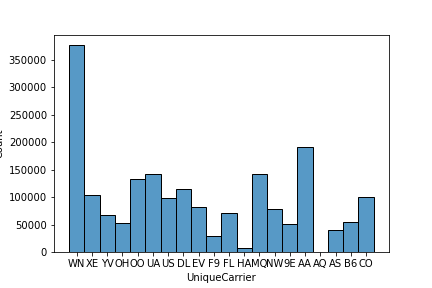

En el siguiente grafico se pùede observar la concentracion de los retrasos en los tiempos de llegada en entre 0-50 minutos, lo que significa que la mayoria de los vuelos registrados tienen retrasos cortos y mientras que los retrasos largos representan una minoria.
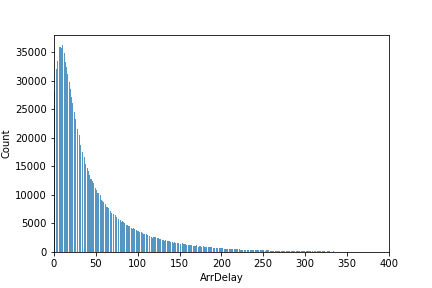

En el siguiente grafico de dispersion se puede observar la relacion entre el retraso de la salida y de la llegada, donde se puede observar los vuelos de mayor retraso:
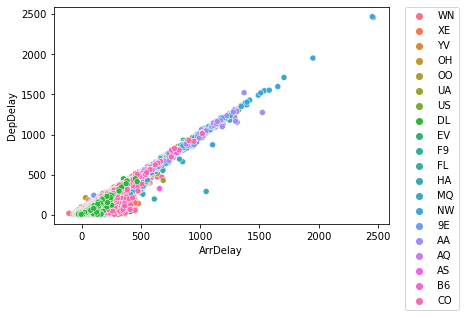

En la siguiente grafica, se puede observar la acumulacion de retrasos de llegada por cada aerolinea registrada, donde las compañias B6 y YV son las que presentan mayor acumulacion en el tiempo de retraso.
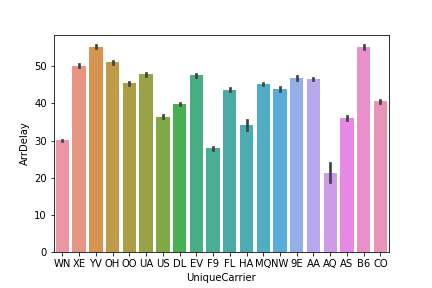

En la siguiente grafica se pueden observar los vuelos con mayor tiempo en el aire y su relacion entre el retraso de salida y de llegada organizados por compañia aerea. 
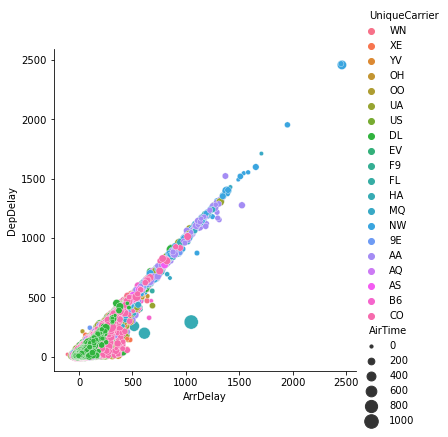

## Ejercicio 3
Exporta la dataset neto y con las nuevas columnas a Excel.
\n 
Por ultimo se exporta el dataset con las columnas nuevas, para ello se utiliza la funcion *'to_excel'*. Debido a que la cantidad de datos incluidas en el dataset sobrepasa el limite de una hoja de calculo, se dividio la informacion en dos hojas de calculo.

In [16]:
airlines1 = airlines_delay.iloc[:airlines_delay.shape[0]//2,:] #divide la 1ra parte del dataset
airlines2 = airlines_delay.iloc[airlines_delay.shape[0]//2:,:] #divide la 2da parte del dataset
writer = pd.ExcelWriter('airlines_delay.xlsx', engine='xlsxwriter') #Crea Pd Excel writer usando XlsxWriter como engine.
airlines1.to_excel(writer, sheet_name='First Sheet') #guarda cada df en una hoja
airlines2.to_excel(writer, sheet_name='Second Sheet')

In [17]:
writer.save() #cierra el excel writer de pandas y genera el archivo